In [79]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
from keras import layers

In [80]:
# Setting
nsamples = 2000     # Number of sample to use as a dataset
val_ratio = 0.2     # Percentage of samples that should be held for validation set
test_ratio = 0.2    # Percentage of samples that should be held for test set
tfile_model_name = "sine_model"
c_model_name = 'sine_model'

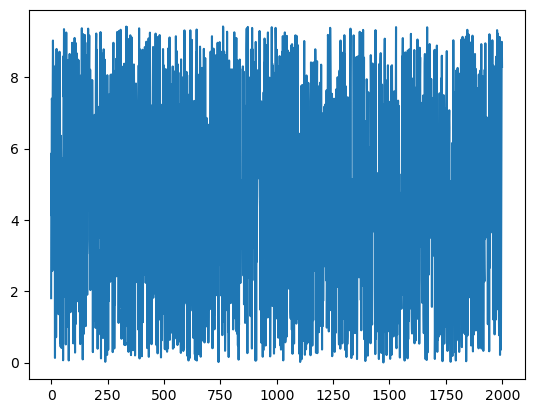

In [81]:
# Generate some random samples
np.random.seed(1234)
x_values = np.random.uniform(low=0, high=(2*math.pi), size=nsamples)
plt.plot(x_values)

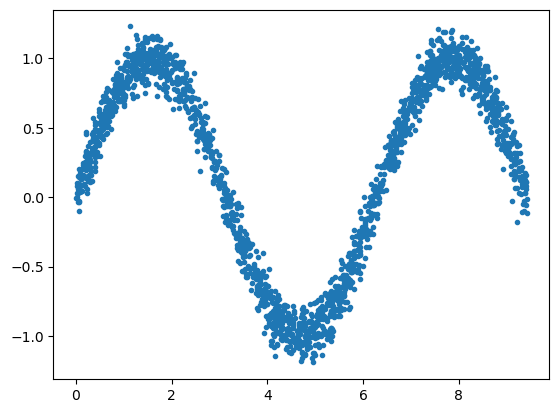

In [82]:
# Create a noisy sinewave with these values
y_values = np.sin(x_values) + (0.1 * np.random.randn(x_values.shape[0]))
plt.plot(x_values, y_values, '.')

In [83]:
# Split the dataset into training, validation, and test sets
val_split = int(val_ratio * nsamples)
test_split = int(val_split + (test_ratio * nsamples))
x_val, x_test, x_train = np.split(x_values, [val_split, test_split])
print("x_values size : {0}".format(np.size(x_values)))
print("x_val size : {0}".format(np.size(x_val)))
print("x_test size : {0}".format(np.size(x_test)))
print("x_train size : {0}".format(np.size(x_train)))

y_val, y_test, y_train = np.split(y_values, [val_split, test_split])
print("y_values size : {0}".format(np.size(y_values)))
print("y_val size : {0}".format(np.size(y_val)))
print("y_test size : {0}".format(np.size(y_test)))
print("y_train size : {0}".format(np.size(y_train)))

# Check that our splits add up correctly
assert(x_train.size + x_val.size + x_test.size) == nsamples

x_values size : 2000
x_val size : 400
x_test size : 400
x_train size : 1200
y_values size : 2000
y_val size : 400
y_test size : 400
y_train size : 1200


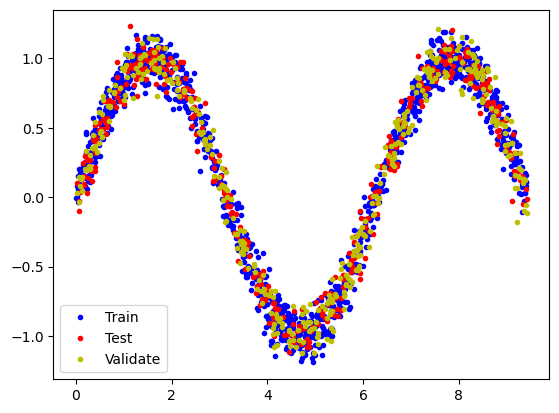

In [84]:
# Plot the data in each partition in different colors
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.plot(x_val, y_val, 'y.', label="Validate")
plt.legend()
plt.show()

In [85]:
# Create a model
model = tf.keras.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(1,)))
model.add(layers.Dense(128, activation='linear'))
model.add(layers.Dense(1))

# View model
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 128)               256       
                                                                 
 dense_17 (Dense)            (None, 128)               16512     
                                                                 
 dense_18 (Dense)            (None, 1)                 129       
                                                                 
Total params: 16,897
Trainable params: 16,897
Non-trainable params: 0
_________________________________________________________________


In [86]:
# Add optimizer, loss function, and metrics to model and complie it
model.compile(optimizer='adam', loss='mse', metrics='mse')

In [87]:
# Train model
history = model.fit(x_train,
                    y_train,
                    epochs=100,
                    validation_data=(x_val, y_val))

Epoch 1/100
38/38 [==============================] - 1s 12ms/step - loss: 0.5756 - mse: 0.5756 - val_loss: 0.5305 - val_mse: 0.5305
Epoch 2/100
38/38 [==============================] - 0s 4ms/step - loss: 0.5378 - mse: 0.5378 - val_loss: 0.4788 - val_mse: 0.4788
Epoch 3/100
38/38 [==============================] - 0s 4ms/step - loss: 0.4950 - mse: 0.4950 - val_loss: 0.4748 - val_mse: 0.4748
Epoch 4/100
38/38 [==============================] - 0s 4ms/step - loss: 0.5055 - mse: 0.5055 - val_loss: 0.4889 - val_mse: 0.4889
Epoch 5/100
38/38 [==============================] - 0s 4ms/step - loss: 0.4863 - mse: 0.4863 - val_loss: 0.4954 - val_mse: 0.4954
Epoch 6/100
38/38 [==============================] - 0s 4ms/step - loss: 0.4936 - mse: 0.4936 - val_loss: 0.4665 - val_mse: 0.4665
Epoch 7/100
38/38 [==============================] - 0s 4ms/step - loss: 0.4837 - mse: 0.4837 - val_loss: 0.4630 - val_mse: 0.4630
Epoch 8/100
38/38 [==============================] - 0s 5ms/step - loss: 0.4960 - 

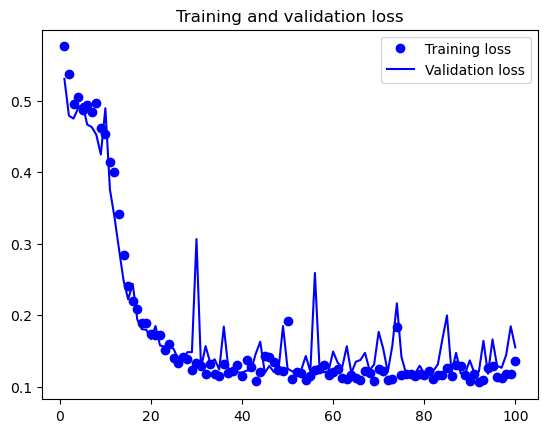

In [88]:
# Plot the training history
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

13/13 [==============================] - 0s 2ms/step


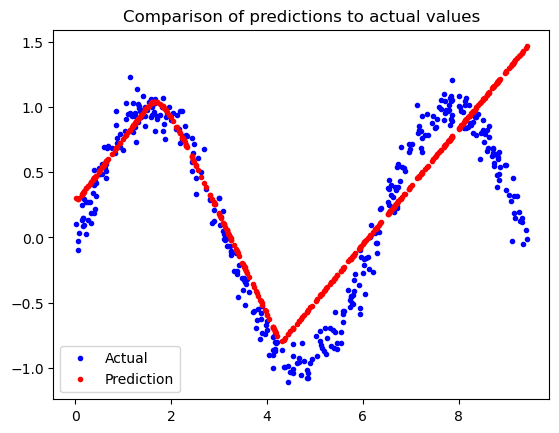

In [89]:
# Plot prediction against actual values
prd = model.predict(x_test)

plt.clf()
plt.title('Comparison of predictions to actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, prd, 'r.', label='Prediction')
plt.legend()
plt.show()

In [90]:
model.predict(np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0]))

1/1 [==============================] - 0s 23ms/step


array([[ 0.3046771 ],
       [ 0.75765735],
       [ 0.91826516],
       [ 0.18031004],
       [-0.5912324 ],
       [-0.49461865]], dtype=float32)

In [91]:
# Save Keras model
model.save(tfile_model_name + '.h5')

In [92]:
# Convert Keras model to a tflite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

open(tfile_model_name + '.tflite', 'wb').write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\LeeJH\AppData\Local\Temp\tmpneuq_edk\assets


INFO:tensorflow:Assets written to: C:\Users\LeeJH\AppData\Local\Temp\tmpneuq_edk\assets


19816

3/3 [==============================] - 0s 3ms/step


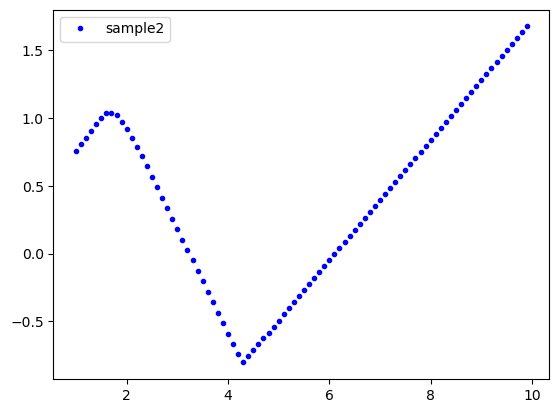

In [93]:
sample2 = np.arange(1.0, 10.0, 0.1)
prd = model.predict(sample2)

plt.clf()
plt.plot(sample2, prd, 'b.', label='sample2')
plt.legend()
plt.show()